In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
val_data = pd.read_csv('validation.csv')

train_data = train_data.dropna()
test_data = test_data.dropna()
val_data = val_data.dropna()

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data['message'])
X_val = vectorizer.transform(val_data['message'])
X_test = vectorizer.transform(test_data['message'])

y_train, y_val, y_test = train_data['label'], val_data['label'], test_data['label']


In [5]:
#Evaluates the model
def evaluate_model(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    
    return {
        "Precision": round(precision,3),
        "Recall": round(recall,3),
    }


In [10]:
def tune_hyperparameters(model, param_grid, X_train, y_train, X_val, y_val):
    grid_search = GridSearchCV(model, param_grid, scoring='f1', cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    
    # Evaluate best model
    train_preds = best_model.predict(X_train)
    val_preds = best_model.predict(X_val)
    
    train_metrics = evaluate_model(y_train, train_preds)
    val_metrics = evaluate_model(y_val, val_preds)
    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'Train Metrics: {train_metrics}')
    print(f'Validation Metrics: {val_metrics}')

    df_results = pd.DataFrame({"Train": train_metrics, "Validation": val_metrics})
    df_results = df_results.reset_index().rename(columns={'index': 'Metric'})
    df_melted = df_results.melt(id_vars="Metric", var_name="Dataset", value_name="Score")

    plt.figure(figsize=(8, 5))
    sns.barplot(x="Metric", y="Score", hue="Dataset", data=df_melted, palette="viridis")
    
    plt.title("Train vs Validation Scores")
    plt.xlabel("Metrics")
    plt.ylabel("Score")
    plt.ylim(0, 1)  
    plt.legend(title="Dataset")
    plt.show()


In [11]:
def validate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    train_metrics = evaluate_model(y_train, train_preds)
    val_metrics = evaluate_model(y_val, val_preds)
    print(f'Train Metrics: {train_metrics}')
    print(f'Validation Metrics: {val_metrics}')

    df_results = pd.DataFrame({"Train": train_metrics, "Validation": val_metrics})
    df_results = df_results.reset_index().rename(columns={'index': 'Metric'})
    df_melted = df_results.melt(id_vars="Metric", var_name="Dataset", value_name="Score")
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x="Metric", y="Score", hue="Dataset", data=df_melted, palette="viridis")
    
    plt.title("Train vs Validation Scores")
    plt.xlabel("Metrics")
    plt.ylabel("Score")
    plt.ylim(0, 1)  
    plt.legend(title="Dataset")
    plt.show()

### Validation Dataset

Training Logistic Regression
Train Metrics: {'Precision': np.float64(0.98), 'Recall': np.float64(0.685)}
Validation Metrics: {'Precision': np.float64(0.972), 'Recall': np.float64(0.714)}


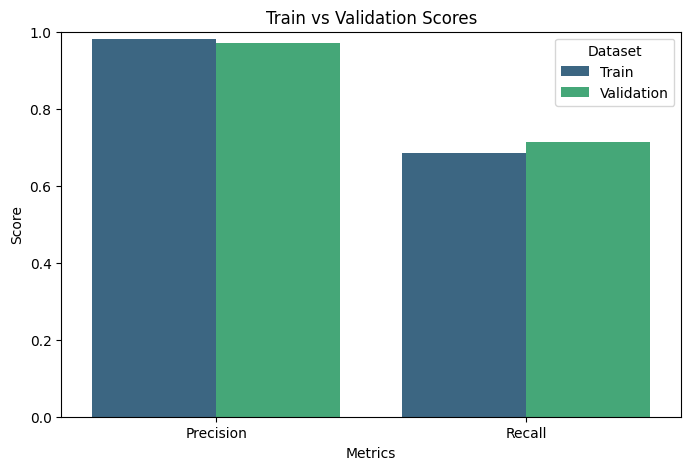

Training Random Forest
Train Metrics: {'Precision': np.float64(1.0), 'Recall': np.float64(0.998)}
Validation Metrics: {'Precision': np.float64(1.0), 'Recall': np.float64(0.755)}


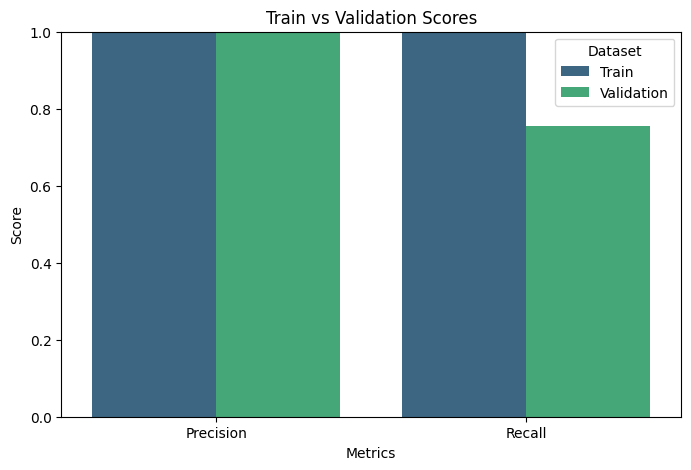

Training Naive Bayes
Train Metrics: {'Precision': np.float64(1.0), 'Recall': np.float64(0.768)}
Validation Metrics: {'Precision': np.float64(1.0), 'Recall': np.float64(0.633)}


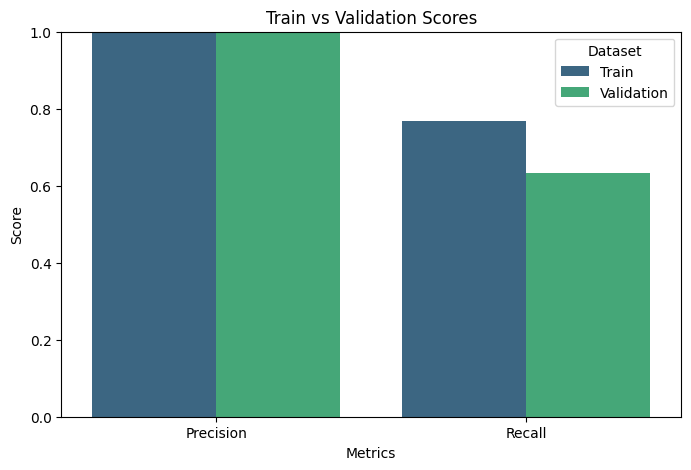

In [12]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB()
}


for name, model in models.items():
    print(f"Training {name}")
    validate_model(model, X_train, y_train, X_val, y_val)

### Hyperparameter Tuning

Training Logistic Regression
Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Train Metrics: {'Precision': np.float64(1.0), 'Recall': np.float64(0.995)}
Validation Metrics: {'Precision': np.float64(0.978), 'Recall': np.float64(0.898)}


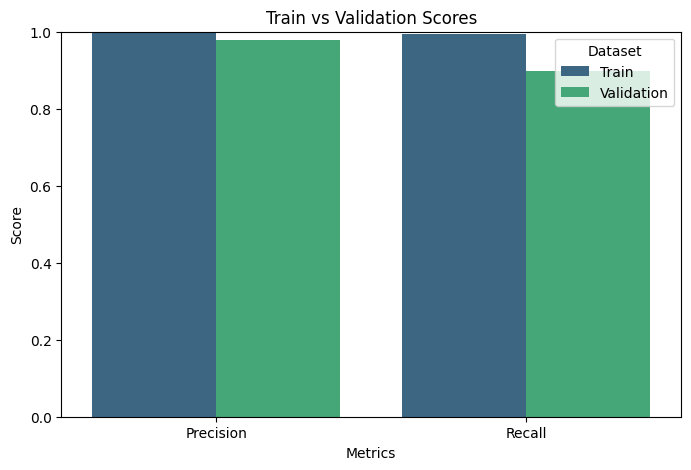

Training Random Forest
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Train Metrics: {'Precision': np.float64(1.0), 'Recall': np.float64(0.998)}
Validation Metrics: {'Precision': np.float64(0.974), 'Recall': np.float64(0.776)}


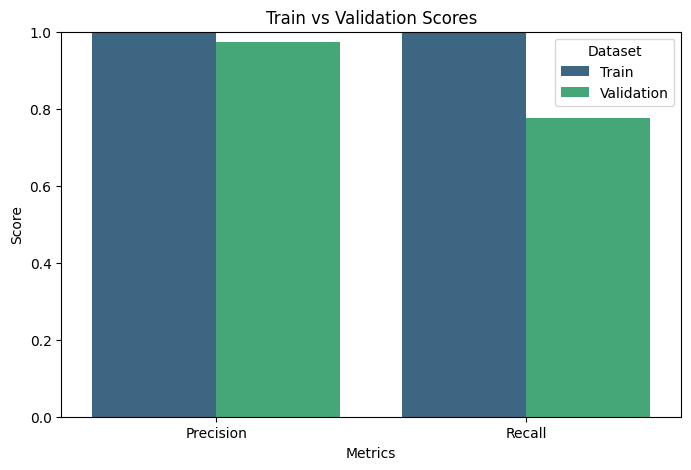

Training Naive Bayes
Best Parameters: {'alpha': 0.1, 'fit_prior': True}
Train Metrics: {'Precision': np.float64(0.993), 'Recall': np.float64(0.958)}
Validation Metrics: {'Precision': np.float64(0.953), 'Recall': np.float64(0.837)}


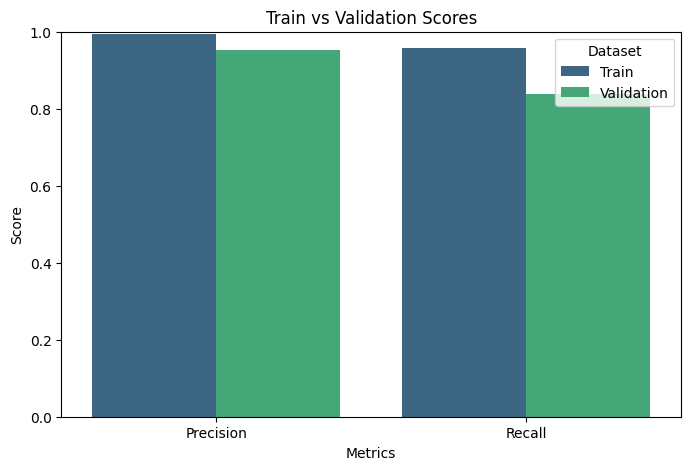

In [13]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB()
}

hyperparameters = {
    "Logistic Regression": {
    'C': [0.01, 0.1, 1, 10, 100], 
    'penalty': ['l2'],  
    'solver': ['liblinear', 'lbfgs']  
    },

    "Random Forest": {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
    },

    "Naive Bayes": {
    'alpha': [0.01, 0.1, 1, 10],  # Smoothing parameter
    'fit_prior': [True, False]  # Whether to learn class priors
    }
}



for name, model in models.items():
    print(f"Training {name}")
    tune_hyperparameters(model, hyperparameters[name], X_train, y_train, X_val, y_val)

- Logistic Regression is the best fit model with Precision = 0.978 and Recall = 0.898

### Test Dataset

In [14]:
model = LogisticRegression(C=100, penalty= 'l2', solver= 'lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_model(y_test, y_pred)

{'Precision': np.float64(0.96), 'Recall': np.float64(0.829)}